In [ ]:
!pip install avalanche-lib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.2/134.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.9/971.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.5 MB/s eta 0:00:00
  

In [ ]:
pip install pytorchcv==0.0.67

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: pytorchcv
    Found existing installation: pytorchcv 0.0.71
    Uninstalling pytorchcv-0.0.71:
      Successfully uninstalled pytorchcv-0.0.71


In [ ]:
!pip install kaggle

In [ ]:
#from avalanche.benchmarks.datasets import MNIST
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
from torch.nn import Module, Linear
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torchvision
from torchvision.datasets import usps
from torchvision.models import resnet50, ResNet50_Weights, mobilenet_v2, MobileNet_V2_Weights
from torchvision import transforms, models

import pytorchcv
import matplotlib.pyplot as plt
from avalanche.benchmarks.classic import SplitMNIST, PermutedMNIST, SplitCIFAR10, SplitCUB200, SplitTinyImageNet, CORe50
from avalanche.benchmarks.datasets import OpenLORIS, ImageNet, Stream51, CIFAR10
from avalanche.benchmarks import nc_benchmark, ni_benchmark
from torchvision import transforms
from torchvision.transforms import ToTensor, Compose, Resize, Normalize
from torch.utils.data import Subset
from avalanche.benchmarks import DatasetScenario
from avalanche.models import SimpleMLP, IcarlNet
from avalanche.training.plugins import EWCPlugin
from avalanche.training.plugins import ReplayPlugin
from avalanche.training import Replay
from avalanche.training import Naive, EWC, ICaRL
from avalanche.training.plugins import EvaluationPlugin
from avalanche.logging import InteractiveLogger
from avalanche.evaluation.metrics import accuracy_metrics, Accuracy, forgetting_metrics, bwt_metrics, forward_transfer_metrics, confusion_matrix_metrics, loss_metrics
from avalanche.evaluation import PluginMetric
from avalanche.evaluation.metrics import Accuracy
from avalanche.evaluation.metric_results import MetricValue
from avalanche.evaluation.metric_utils import get_metric_name


#AMAZON
import re
import string
import collections

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
benchmark = SplitMNIST(n_experiences=5, seed=1)

train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

model = SimpleMLP()
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)

EntropiaCruzada = torch.nn.CrossEntropyLoss()
criterion = EntropiaCruzada

evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[InteractiveLogger()]
)

cl_strategy = EWC(
    model,
    optimizer,
    criterion,
    ewc_lambda=0.4,
    train_mb_size=128,
    train_epochs=4,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

for experience in train_stream:
    print("Current experience: {}".format(experience.current_experience))
    print("Current Classes: ", experience.classes_in_this_experience)
    cl_strategy.train(experience)
    print("Evaluating on the test set:")
    cl_strategy.eval(test_stream)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 53365000.40it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1839961.33it/s]

Extracting /root/.avalanche/data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13996833.45it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8329920.76it/s]

Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw




/usr/local/lib/python3.10/dist-packages/avalanche/training/templates/base.py:468: PositionalArgumentsDeprecatedWarning: Avalanche is transitioning to strategy constructors that accept named (keyword) arguments only. This is done to ensure that there is no confusion regarding the meaning of each argument (strategies can have many arguments). Your are passing 3 positional arguments to the EWC.__init__ method. Consider passing them as names arguments. The ability to pass positional arguments will be removed in the future.
  warnings.warn(error_str, category=PositionalArgumentsDeprecatedWarning)


Current experience: 0
-- >> Start of training phase << --
100%|██████████| 469/469 [00:24<00:00, 19.19it/s]
Epoch 0 ended.
100%|██████████| 469/469 [00:22<00:00, 20.65it/s]
Epoch 1 ended.
100%|██████████| 469/469 [00:21<00:00, 22.01it/s]
Epoch 2 ended.
100%|██████████| 469/469 [00:22<00:00, 21.21it/s]
Epoch 3 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:03<00:00, 23.18it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.9313
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:04<00:00, 18.90it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.1588
-- Starting eval on experience 2 (Task 0) from test stream --
100%|██████████| 79/79 [00:03<00:00, 25.25it/s]
> Eval on experience 2 (Task 0) from test stream end

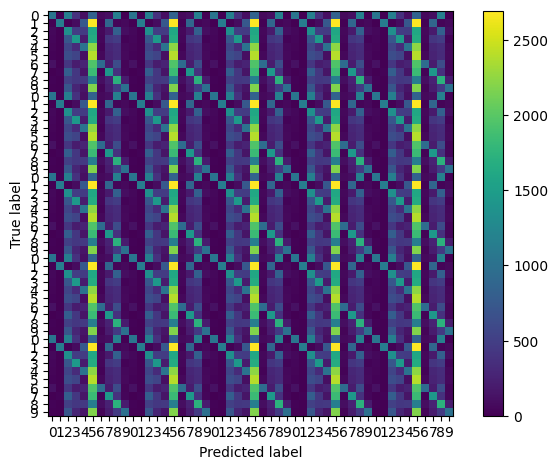

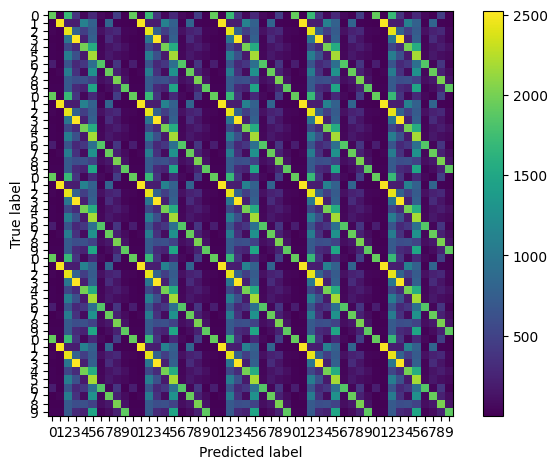

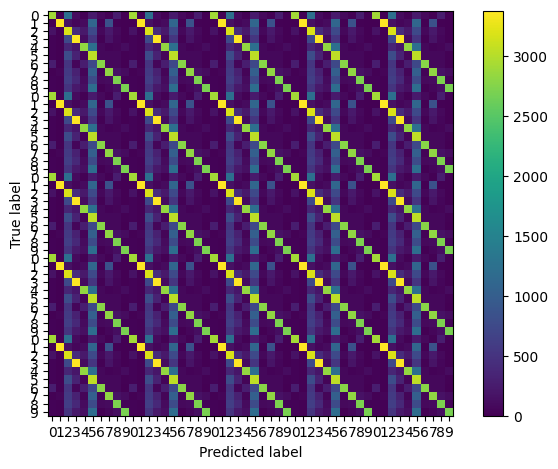

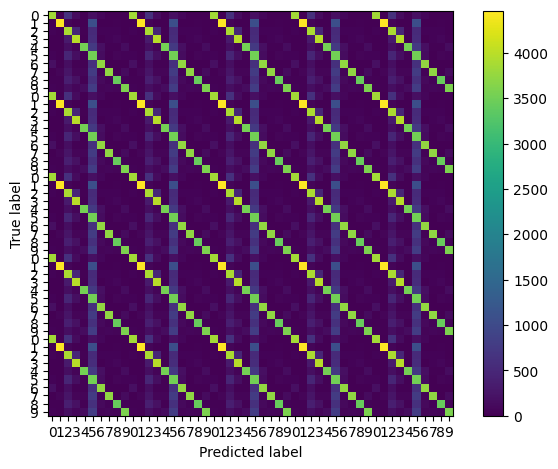

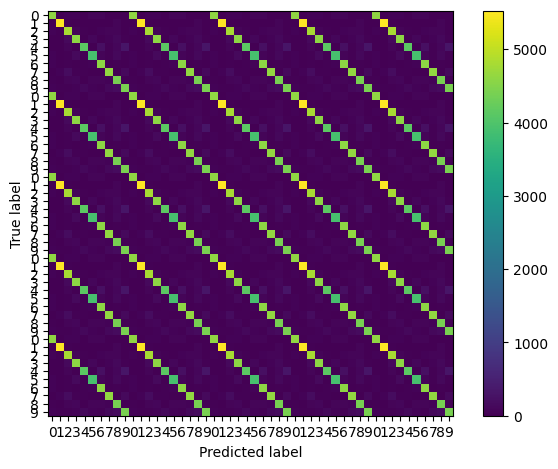

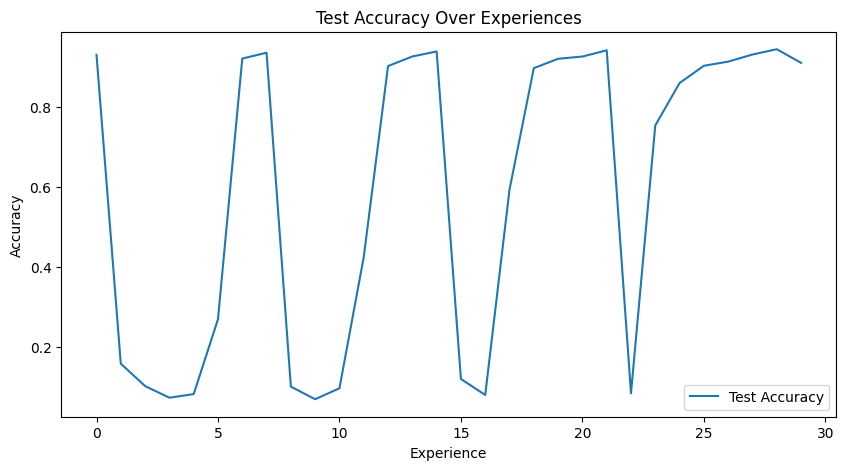

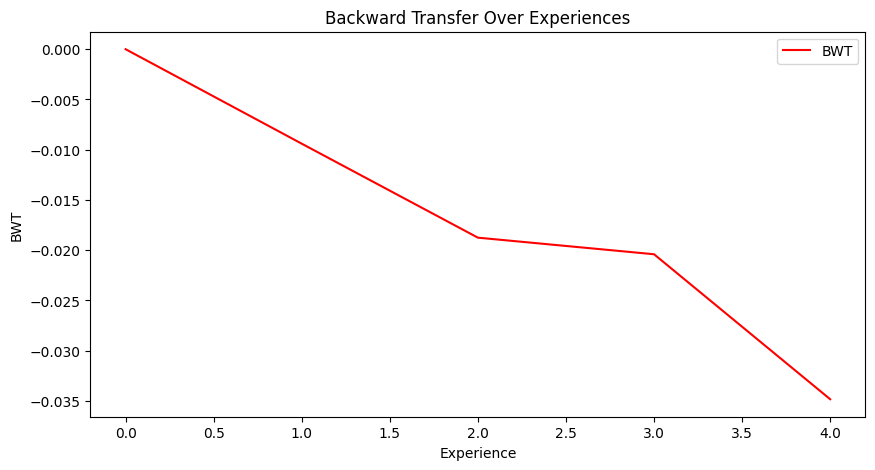

In [ ]:
benchmark = PermutedMNIST(n_experiences=5, return_task_id=False)
train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

model = SimpleMLP()
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(experience=True, stream=True),
    bwt_metrics(experience=True, stream=True),
    confusion_matrix_metrics(num_classes=benchmark.n_classes, save_image=True, stream=True),
    loggers=[InteractiveLogger()]
)

cl_strategy = EWC(
    model,
    optimizer,
    criterion,
    ewc_lambda=0.4,
    train_mb_size=128,
    train_epochs=4,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

train_accuracies = []
test_accuracies = []
bwt_values = []

for experience in train_stream:
    print(f"Current experience: {experience.current_experience}")
    cl_strategy.train(experience)

    eval_results = cl_strategy.eval(test_stream)

    print("Available keys in eval_results:")
    for key in eval_results.keys():
        print(f"{key}: {eval_results[key]}")

    for exp_id in range(len(train_stream)):
        try:
            acc = eval_results.get(f'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp00{exp_id}', None)
            if acc is not None:
                test_accuracies.append(acc)
        except KeyError:
            print(f"KeyError: 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp00{exp_id}' not found")
            test_accuracies.append(None)

    try:
        overall_test_acc = eval_results['Top1_Acc_Stream/eval_phase/test_stream/Task000']
        test_accuracies.append(overall_test_acc)
    except KeyError:
        print("KeyError: 'Top1_Acc_Stream/eval_phase/test_stream/Task000' not found")

    try:
        bwt = eval_results['StreamBWT/eval_phase/test_stream']
        bwt_values.append(bwt)
    except KeyError:
        print("KeyError: 'StreamBWT/eval_phase/test_stream' not found")
        bwt_values.append(None)

#Dibujar los resultados si las métricas están disponibles
if test_accuracies:
    plt.figure(figsize=(10, 5))
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.xlabel('Experience')
    plt.ylabel('Accuracy')
    plt.title('Test Accuracy Over Experiences')
    plt.legend()
    plt.show()

if bwt_values:
    plt.figure(figsize=(10, 5))
    plt.plot(bwt_values, label="BWT", color='red')
    plt.xlabel('Experience')
    plt.ylabel('BWT')
    plt.title('Backward Transfer Over Experiences')
    plt.legend()
    plt.show()

In [ ]:
"""transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

n_experiences = 5

#Crear subconjuntos para cada experiencia
def create_experiences(dataset, n_experiences):
    indices = torch.randperm(len(dataset)).tolist()
    split_indices = [indices[i::n_experiences] for i in range(n_experiences)]
    return [Subset(dataset, indices) for indices in split_indices]

train_experiences = create_experiences(train_dataset, n_experiences)
test_experiences = create_experiences(test_dataset, n_experiences)"""

#CNN
"""class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()"""

model = models.squeezenet1_1(pretrained=False)
model.classifier[1] = nn.Conv2d(512, 10, kernel_size=(1, 1), stride=(1, 1))#10 clases para CIFAR-10

model.num_classes = 10

print(model)

criterion = nn.CrossEntropyLoss()
#optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = Adam(model.parameters(), lr=0.001)

benchmark = SplitCIFAR10(n_experiences=5, seed=42)

train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(experience=True, stream=True),
    bwt_metrics(experience=True, stream=True),
    confusion_matrix_metrics(num_classes=benchmark.n_classes, save_image=True, stream=True),
    loggers=[InteractiveLogger()]
)

cl_strategy = EWC(
    model,
    optimizer,
    criterion,
    ewc_lambda=10,
    train_mb_size=128,
    train_epochs=4,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

for experience in train_stream:
    print(f"Current experience: {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluating on the test set:")
    cl_strategy.eval(test_stream)



"""def train(model, dataloader, optimizer, criterion, epochs):
    model.train()
    for epoch in range(epochs):
        for images, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1} ended.")

def evaluate(model, dataloaders):
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for dataloader in dataloaders:
            for images, labels in dataloader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total_samples += labels.size(0)
                total_correct += (predicted == labels).sum().item()
    accuracy = total_correct / total_samples
    return accuracy

for experience_idx, train_data in enumerate(train_experiences):
    print(f"\n--- Training on experience {experience_idx} ---")
    train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
    train(net, train_loader, optimizer, criterion, epochs=10)
    print(f"--- End of training on experience {experience_idx} ---\n")

    for test_exp_idx in range(experience_idx + 1):
        test_loader = DataLoader(test_experiences[test_exp_idx], batch_size=4, shuffle=False, num_workers=2)
        accuracy = evaluate(net, [test_loader])
        print(f"Accuracy on experience {test_exp_idx}: {accuracy:.4f}")"""

In [ ]:
epochs = [0, 1, 2, 3]
experiences = [0, 1, 2, 3, 4]


eval_accuracies = [
    0,
    0,
    0,
    0.5,
    0
]

#Olvido
forgetting = [
    -0.7940,
    -0.5000,
    -0.4875,
    0,
]



#Accuracy de entrenamiento y evaluación
plt.figure(figsize=(14, 6))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(experiences, eval_accuracies, label='Test Acc', marker='o')
plt.xlabel('Experiencia')
plt.ylabel('Accuracy')
plt.title('Test Acc')
plt.legend()
plt.grid()

#Olvido
plt.subplot(1, 2, 2)
plt.plot(experiences[:-1], forgetting, label='BWT', marker='o', color='red')
plt.xlabel('Experiencia')
plt.ylabel('BWT')
plt.title('Olvido')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
#NO EJECUTAR -> SE ACABA LA MEMORIA

"""class MobileNetV2CIFAR10(nn.Module):
    def __init__(self, pretrained=True):
        super(MobileNetV2CIFAR10, self).__init__()
        self.mobilenet = models.mobilenet_v2(pretrained=pretrained)

        # Cambiar la capa final para que tenga 10 clases en lugar de 1000 (para CIFAR10)
        num_ftrs = self.mobilenet.classifier[1].in_features
        self.mobilenet.classifier[1] = nn.Linear(num_ftrs, 10)  # CIFAR-10 tiene 10 clases

    def forward(self, x):
        return self.mobilenet(x)

# Instanciar el modelo adaptado MobileNetV2 para CIFAR10
net = MobileNetV2CIFAR10(pretrained=True)

# Preprocesamiento de las imágenes (CIFAR10 tiene imágenes de 32x32, necesitamos 224x224)
transform = transforms.Compose([
    transforms.Resize(224),  # Redimensionar imágenes a 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # Normalizar CIFAR-10
])

# Crear el benchmark para SplitCIFAR10
benchmark = SplitCIFAR10(n_experiences=5, seed=42, return_task_id=False, train_transform=transform, eval_transform=transform)

train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

# Definir el optimizador y la función de pérdida
optimizer = Adam(net.parameters(), lr=0.001)  # Puedes usar Adam o SGD
criterion = nn.CrossEntropyLoss()

# Crear el plugin de evaluación
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(experience=True, stream=True),
    bwt_metrics(experience=True, stream=True),
    confusion_matrix_metrics(num_classes=benchmark.n_classes, save_image=True, stream=True),
    loggers=[InteractiveLogger()]
)

# Crear la estrategia de EWC (Elastic Weight Consolidation)
cl_strategy = EWC(
    net,
    optimizer,
    criterion,
    ewc_lambda=0.4,
    train_mb_size=128,
    train_epochs=3,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

# Entrenar y evaluar el modelo en el stream de experiencias
for experience in train_stream:
    print(f"Current experience: {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluating on the test set:")
    cl_strategy.eval(test_stream)"""

In [ ]:
_mu = [0.485, 0.456, 0.406]  #Normalizacion
_std = [0.229, 0.224, 0.225]

transform = Compose([
        Resize((224, 224)),
        ToTensor(),
        Normalize(mean=_mu,
        std=_std)
    ])

benchmark = CORe50(scenario='ni', train_transform=transform, eval_transform=transform)

Loading labels...
Loading LUP...
Loading labels names...
Files already downloaded and verified


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        self.fc = nn.Linear(128*56*56, num_classes)

    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        return x

#Modelo, optimizador y función de pérdida
model = SimpleCNN(num_classes=benchmark.n_classes)
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

interactive_logger = InteractiveLogger()

evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    loss_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    bwt_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = EWC(
    model,
    optimizer,
    criterion,
    ewc_lambda=2,
    train_mb_size=128,
    train_epochs=2,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

results = []
for experience in benchmark.train_stream:
    print("Entrenando en la experiencia", experience.current_experience)
    cl_strategy.train(experience)
    print("Evaluando en todo el conjunto de prueba...")
    results.append(cl_strategy.eval(benchmark.test_stream))

/usr/local/lib/python3.10/dist-packages/avalanche/training/templates/base.py:468: PositionalArgumentsDeprecatedWarning: Avalanche is transitioning to strategy constructors that accept named (keyword) arguments only. This is done to ensure that there is no confusion regarding the meaning of each argument (strategies can have many arguments). Your are passing 3 positional arguments to the EWC.__init__ method. Consider passing them as names arguments. The ability to pass positional arguments will be removed in the future.
  warnings.warn(error_str, category=PositionalArgumentsDeprecatedWarning)


Entrenando en la experiencia 0
-- >> Start of training phase << --
100%|██████████| 118/118 [1:11:51<00:00, 36.54s/it]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.8979
	Loss_MB/train_phase/train_stream/Task000 = 0.0517
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7615
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 118/118 [1:11:00<00:00, 36.11s/it]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0665
	Loss_MB/train_phase/train_stream/Task000 = 0.0032
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9803
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
-- >> End of training phase << --
Evaluando en todo el conjunto de prueba...
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 352/352 [1:39:54<00:00, 17.03s/it]
> Eval on experience 0 (Task 0) from test stream ended.
	Loss_Exp/eval_phase/test_stream/Task000/Exp000 = 28.7804
	Top1_Acc_Exp/eval_phase/t

KeyboardInterrupt: 

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import os
os.makedirs('/root/.kaggle/', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

#https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews
!kaggle datasets download -d kritanjalijain/amazon-reviews

In [ ]:
os.listdir()

In [ ]:
import zipfile

with zipfile.ZipFile('amazon-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/amazon-reviews')

In [ ]:
os.listdir('/content/amazon-reviews')

In [ ]:
TRAIN_CSV = '/content/amazon-reviews/train.csv'
TEST_CSV = '/content/amazon-reviews/test.csv'

trainAMAZON_df = pd.read_csv(TRAIN_CSV)
testAMAZON_df = pd.read_csv(TEST_CSV)

print(trainAMAZON_df.head())
print(testAMAZON_df.head())

In [ ]:
trainAMAZON_df.shape

In [ ]:
testAMAZON_df.shape

In [ ]:
trainAMAZON_df.columns = ['label', 'title', 'text']
trainAMAZON_df

In [ ]:
testAMAZON_df.columns = ['label', 'title', 'text']
testAMAZON_df

In [ ]:
trainAMAZON_df = trainAMAZON_df.head(100000)
testAMAZON_df = testAMAZON_df.head(10000)

In [ ]:
print(trainAMAZON_df['label'].value_counts())
print(testAMAZON_df['label'].value_counts())

In [ ]:
def concat_columns(df, col1, col2, new_col):
    df[new_col] = df[col1].apply(str) + ' ' + df[col2].apply(str)
    df.drop(col2, axis = 1, inplace = True)
    return df

trainAMAZON_df = concat_columns(trainAMAZON_df, 'text', 'title', 'text')
testAMAZON_df = concat_columns(testAMAZON_df, 'text', 'title', 'text')

In [ ]:
trainAMAZON_df['label'] = trainAMAZON_df['label'].map({1:0, 2:1})
testAMAZON_df['label'] = testAMAZON_df['label'].map({1:0, 2:1})

In [ ]:
trainAMAZON_df

In [ ]:
testAMAZON_df

Limpieza de los datos

In [ ]:
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-zÀ-ú ]+', '', text)
    # Analyzing the most used words below, i chose to exclude these because there are too many and are unnecessary
    text = re.sub('book|one', '', text)
    # Convert to lower case
    text = text.lower()
    # remove scores
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

trainAMAZON_df['text'] = trainAMAZON_df['text'].apply(clean_text)
testAMAZON_df['text'] = testAMAZON_df['text'].apply(clean_text)

In [ ]:
def remove_stopwords(texto):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(texto.lower())
    return " ".join([token for token in tokens if token not in stop_words])

# Applying the function
trainAMAZON_df['text'] = trainAMAZON_df['text'].apply(remove_stopwords)
testAMAZON_df['text'] = testAMAZON_df['text'].apply(remove_stopwords)

In [ ]:
def normalize_text(text):
    stemmer = SnowballStemmer("english")
    normalized_text = []
    for word in text.split():
        stemmed_word = stemmer.stem(word)
        normalized_text.append(stemmed_word)
    return ' '.join(normalized_text)

# Applying the function
trainAMAZON_df['text'] = trainAMAZON_df['text'].apply(normalize_text)
testAMAZON_df['text'] = testAMAZON_df['text'].apply(normalize_text)

In [ ]:
words = []
for text in trainAMAZON_df['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title and labels
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')




words = []
for text in testAMAZON_df['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title and labels
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

Procesamiento del texto

In [ ]:
# Maximum number of words to be considered in the vocabulary
max_words = 10000
# Maximum number of tokens in a sequence
max_len = 200
# Tokenizer
tokenizer = Tokenizer(num_words = max_words)
# Snap tokenizer to text data
tokenizer.fit_on_texts(trainAMAZON_df['text'])
# Converts texts into strings of numbers
sequences_train = tokenizer.texts_to_sequences(trainAMAZON_df['text'])
sequences_val = tokenizer.texts_to_sequences(testAMAZON_df['text'])
# Mapping words to indexes
word_index = tokenizer.word_index

In [ ]:
# Sequence padding
data_train = pad_sequences(sequences_train, maxlen = max_len, dtype='int32')
data_val = pad_sequences(sequences_val, maxlen = max_len, dtype='int32')

data_val.shape

In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = torch.tensor(texts, dtype=torch.long)
        self.targets = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.targets[idx]

In [ ]:
"""
labels_train = trainAMAZON_df['label'].values.astype(int)
labels_val = testAMAZON_df['label'].values.astype(int)

train_dataset = TextDataset(data_train, labels_train)
val_dataset = TextDataset(data_val, labels_val)"""





"""train_labels = torch.tensor(trainAMAZON_df['label'].values, dtype=torch.float32)
val_labels = torch.tensor(testAMAZON_df['label'].values, dtype=torch.float32)

data_train = torch.tensor(data_train, dtype=torch.long)
data_val = torch.tensor(data_val, dtype=torch.long)

train_dataset = TensorDataset(data_train, train_labels)
val_dataset = TensorDataset(data_val, val_labels)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)"""




"""#Convertir las etiquetas de float a int (0 o 1)
train_labels = torch.tensor(trainAMAZON_df['label'].values, dtype=torch.float32)
val_labels = torch.tensor(testAMAZON_df['label'].values, dtype=torch.float32)

data_train_np = data_train.numpy()
data_val_np = data_val.numpy()

train_dataset_benchmark = TextDataset(data_train_np, train_labels)
val_dataset_benchmark = TextDataset(data_val_np, val_labels)"""






train_labels = torch.tensor(trainAMAZON_df['label'].values, dtype=torch.float32)
val_labels = torch.tensor(testAMAZON_df['label'].values, dtype=torch.float32)

train_dataset_benchmark = TextDataset(data_train, train_labels)
val_dataset_benchmark = TextDataset(data_val, val_labels)

In [ ]:
benchmark = ni_benchmark(
    train_dataset=train_dataset_benchmark,
    test_dataset=val_dataset_benchmark,
    n_experiences=10,
    shuffle=True,
    seed=1234,
    task_labels=False
)

# Obtener los streams
train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

print("Benchmark creado con éxito.")

In [ ]:
class SentimentNet(nn.Module):
    def __init__(
        self,
        vocab_size,
        output_size,
        embedding_dim,
        hidden_dim,
        n_layers,
        drop_prob=0.5,
    ):
        super(SentimentNet, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(
            embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True
        )
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        batch_size = x.size(0)

        hidden = self.init_hidden(batch_size)

        x = x.long()

        embeds = self.embedding(x)

        lstm_out, hidden = self.lstm(embeds, hidden)

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        out = out.view(batch_size, -1)
        out = out[:, -1]
        return out

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
        )
        return hidden


output_size = 1
embedding_dim = 400
hidden_dim = 512
n_layers = 2



max_words = 10000
embed_dim = 16
max_len = 200


model = SentimentNet(max_words, output_size, embedding_dim, hidden_dim, n_layers)
print(model)

criterion = torch.nn.BCELoss() #Binary Cross Entropy
#optimizer = SGD(model.parameters(), lr=10)
optimizer = Adam(model.parameters(), lr=2)

#Funcion de perdida para arreglar los long-float
class CustomBCELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.bce = nn.BCELoss()

    def forward(self, input, target):
        #print(f'Output: {input}')
        #print(f'Target: {target}')

        return self.bce(input, target.float())

interactive_logger = InteractiveLogger()

criterion = CustomBCELoss()

evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = EWC(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    ewc_lambda=0.4,
    train_mb_size=64,
    train_epochs=5,
    eval_mb_size=64,
    evaluator=evaluation_plugin
)

for experience in train_stream:
    print("Current experience: {}".format(experience.current_experience))
    print("Current Classes: ", experience.classes_in_this_experience)
    cl_strategy.train(experience)
    print("Evaluating on the test set:")
    cl_strategy.eval(test_stream)

In [ ]:
"""class SimpleNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, max_len):
        super(SimpleNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(embed_dim, 1)
        #self.fc = nn.Linear(embed_dim, 64)
        #self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = self.global_avg_pool(x)
        x = x.squeeze(-1)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x.squeeze()


max_words = 10000
embed_dim = 16
max_len = 200


model = SimpleNN(vocab_size=max_words, embed_dim=embed_dim, max_len=max_len)

criterion = torch.nn.BCELoss()
#optimizer = SGD(model.parameters(), lr=10)
optimizer = Adam(model.parameters(), lr=2)

#Funcion de perdida para arreglar los long-float
class CustomBCELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.bce = nn.BCELoss()

    def forward(self, input, target):
        #print(f'Output: {input}')
        #print(f'Target: {target}')

        return self.bce(input, target.float())

interactive_logger = InteractiveLogger()

criterion = CustomBCELoss()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = EWC(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    ewc_lambda=0.4,
    train_mb_size=64,
    train_epochs=15,
    eval_mb_size=64,
    evaluator=evaluation_plugin
)

for experience in train_stream:
    print("Current experience: {}".format(experience.current_experience))
    print("Current Classes: ", experience.classes_in_this_experience)
    cl_strategy.train(experience)
    print("Evaluating on the test set:")
    cl_strategy.eval(test_stream)"""